<a href="https://colab.research.google.com/github/preetamjumech/Rose_Vs_Tulip_CNN_fromScratch/blob/main/Preetam_Saha_27_09_2022_Tulip_Vs_Rose_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/MyDrive/deep learning problem.zip"

Archive:  /content/drive/MyDrive/deep learning problem.zip
   creating: test/
  inflating: test/rose4              
  inflating: test/rose5              
  inflating: test/rose7              
  inflating: test/rose11             
  inflating: test/rose14             
  inflating: test/rose15             
  inflating: test/rose16             
  inflating: test/rose17             
  inflating: test/rose20             
  inflating: test/rose21             
  inflating: test/rose25             
  inflating: test/rose27             
  inflating: test/rose29             
  inflating: test/rose72             
  inflating: test/rose74             
  inflating: test/rose75             
  inflating: test/rose76             
  inflating: test/rose78             
  inflating: test/rose79             
  inflating: test/rose81             
  inflating: test/rose85             
  inflating: test/rose91             
  inflating: test/tulip2             
  inflating: test/tulip3             
  inflatin

In [2]:
import re, shutil , os

In [3]:
try:
  os.makedirs("Train")
  os.makedirs("Train/rose")
  os.makedirs("Train/tulip")
except:
  pass

In [4]:
try:
  os.makedirs("Val")
  os.makedirs("Val/rose")
  os.makedirs("Val/tulip")
except:
  pass

In [5]:
len(os.listdir('train'))

394

In [6]:
len(os.listdir('test'))

55

In [7]:
os.listdir("train")[:10]

['rose109',
 'tulip205',
 'tulip347',
 'tulip254',
 'rose104',
 'tulip340',
 'tulip118',
 'tulip107',
 'tulip292',
 'tulip307']

In [8]:
import numpy as np

In [9]:
np.random.seed(0)
index = np.array(range(len(os.listdir("train"))))
np.random.shuffle(index)

In [10]:
train_img_index = np.array(os.listdir("train"))[index[:300]] #after converting into array, then it is possible to indexing
train_img_index

array(['tulip62', 'rose174', 'tulip349', 'rose198', 'tulip170', 'tulip51',
       'rose320', 'tulip215', 'rose291', 'tulip322', 'tulip236',
       'tulip132', 'rose168', 'rose217', 'tulip109', 'tulip275',
       'tulip362', 'tulip186', 'tulip328', 'tulip329', 'tulip273',
       'rose273', 'rose125', 'tulip192', 'tulip363', 'tulip82', 'rose269',
       'tulip355', 'rose383', 'tulip297', 'tulip259', 'rose274',
       'tulip232', 'tulip281', 'tulip234', 'tulip94', 'tulip173',
       'tulip158', 'rose244', 'tulip118', 'tulip205', 'rose227',
       'tulip235', 'tulip241', 'tulip121', 'tulip351', 'tulip146',
       'tulip358', 'tulip376', 'tulip201', 'rose300', 'tulip147',
       'tulip313', 'tulip39', 'rose375', 'tulip120', 'tulip237',
       'rose127', 'tulip187', 'tulip67', 'rose113', 'tulip54', 'tulip95',
       'tulip340', 'rose93', 'rose188', 'tulip107', 'tulip386',
       'tulip246', 'tulip271', 'tulip135', 'rose257', 'tulip379',
       'tulip298', 'tulip323', 'tulip222', 'tulip104', 

In [11]:
val_img_index = np.array(os.listdir("train"))[index[300:]] 
val_img_index

array(['tulip391', 'rose95', 'rose182', 'rose310', 'tulip181', 'tulip333',
       'rose186', 'rose351', 'rose349', 'rose287', 'rose185', 'rose205',
       'tulip176', 'tulip142', 'rose285', 'tulip399', 'rose373',
       'tulip305', 'tulip308', 'tulip161', 'tulip184', 'rose339',
       'rose150', 'tulip70', 'tulip60', 'tulip269', 'rose364', 'tulip258',
       'tulip339', 'tulip114', 'rose314', 'tulip267', 'tulip359',
       'tulip299', 'rose234', 'rose382', 'tulip191', 'rose387',
       'tulip131', 'rose138', 'rose301', 'tulip255', 'tulip128', 'rose98',
       'tulip85', 'rose294', 'rose139', 'rose118', 'tulip360', 'tulip78',
       'rose249', 'rose171', 'rose164', 'tulip354', 'tulip346', 'rose261',
       'tulip356', 'tulip97', 'rose129', 'tulip293', 'tulip228',
       'rose245', 'tulip382', 'tulip93', 'tulip99', 'tulip124',
       'tulip343', 'tulip280', 'rose260', 'rose130', 'rose100', 'tulip69',
       'tulip317', 'tulip384', 'tulip66', 'tulip108', 'tulip247',
       'tulip310', 'tu

In [12]:
for file in train_img_index:
  if re.findall("rose+",file):
    shutil.move("train/"+file,"Train/rose/"+file+".jpeg")
  elif re.findall("tulip+",file):
    shutil.move("train/"+file,"Train/tulip/"+file+".jpeg")
  else:
    continue

In [13]:
for file in val_img_index:
  if re.findall("rose+",file):
    shutil.move("train/"+file,"Val/rose/"+file+".jpeg")
  elif re.findall("tulip+",file):
    shutil.move("train/"+file,"Val/tulip/"+file+".jpeg")
  else:
    continue

In [14]:
len(os.listdir("train"))

0

In [15]:
from torchvision.datasets import ImageFolder #imagefolder will go to the folder and read the images 
from torchvision import transforms #transforms automatically converts them into tensors
from torch.utils.data import DataLoader, TensorDataset

In [16]:
#data augmentation part
tranf = transforms.Compose([transforms.PILToTensor(),
                            transforms.Resize(size=(256,256)),
                            transforms.RandomHorizontalFlip(),
                            transforms.RandomVerticalFlip()
                            ])

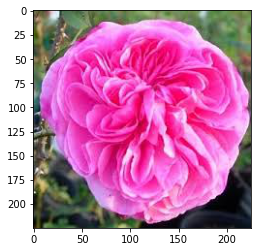

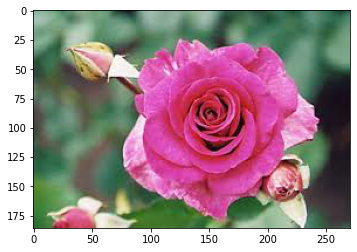

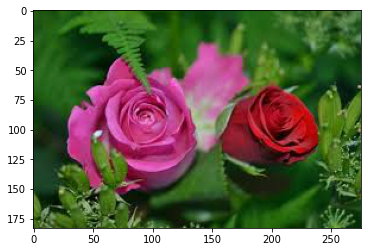

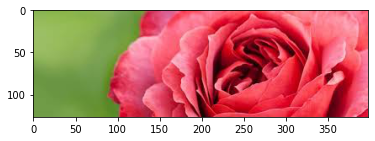

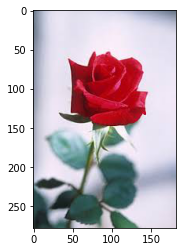

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

for i in os.listdir("Train/rose")[20:25]:
  plt.figure()
  a=Image.open(f"Train/rose/{i}")
  plt.imshow(a)

In [19]:
train_loader = DataLoader(ImageFolder("Train",transform = tranf),batch_size=32,shuffle=True)

In [20]:
val_loader = DataLoader(ImageFolder("Val",transform = tranf),batch_size=128,shuffle=False)

In [21]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam

In [23]:
class rose_Vs_tulip(nn.Module):
  def __init__(self):
    super(rose_Vs_tulip,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1) #in_channels=RGB(3),out_channels=no of filters
    self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1) #kernel_size=3, padding =1 ,same size
    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,padding=1)
    self.bn2 = nn.BatchNorm2d(num_features=16) #for 2
    self.bn3 = nn.BatchNorm2d(num_features=32)
    self.bn4 = nn.BatchNorm2d(num_features=64)
    self.drop = nn.Dropout() #dont have parametrs to be learned. so defining only once
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #dont have parametrs to be learned. so defining only once
    self.fc1 = nn.Linear(in_features=8*8*256,out_features=512)
    self.fc2 = nn.Linear(in_features=512,out_features=64)
    self.fc3 = nn.Linear(in_features=64,out_features=2)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.pool(x) #size = 128

    x = self.bn2(x) #batchnormalization, conv, pooling
    x= F.relu(self.conv2(x))
    x = self.pool(x) #size = 64
 
    x = self.bn3(x)
    x = F.relu(self.conv3(x))
    x = self.pool(x) #size = 32

    x = self.bn4(x)
    x = F.relu(self.conv4(x))
    x = self.pool(x) #size = 16
    x = self.drop(x) 
    
    x = F.relu(self.conv5(x))
    x = self.pool(x) #size = 8

    x = x.view(x.size()[0],-1)
    x = F.relu(self.fc1(x))
    x = self.drop(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return x

In [24]:
model = rose_Vs_tulip()

In [25]:
opt = Adam(model.parameters(), lr=0.0001)

In [26]:
import torchsummary

In [27]:
torchsummary.summary(model, input_size=(3,256,256),device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 256, 256]             448
         MaxPool2d-2         [-1, 16, 128, 128]               0
       BatchNorm2d-3         [-1, 16, 128, 128]              32
            Conv2d-4         [-1, 32, 128, 128]           4,640
         MaxPool2d-5           [-1, 32, 64, 64]               0
       BatchNorm2d-6           [-1, 32, 64, 64]              64
            Conv2d-7           [-1, 64, 64, 64]          18,496
         MaxPool2d-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10          [-1, 128, 32, 32]          73,856
        MaxPool2d-11          [-1, 128, 16, 16]               0
          Dropout-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

In [28]:
from tqdm import tqdm

In [29]:
def train(model, train_loader, opt):
    train_loss = 0.0
    model.train()
    for batch, target in tqdm(train_loader):
        batch = batch.float().to('cuda')
        target = target.to('cuda')

        opt.zero_grad()
        output = model(batch)
        loss = F.cross_entropy(output, target)
        loss.backward()
        opt.step()
        train_loss += loss.item()

    return train_loss

In [30]:
def validate(model, val_loader, opt):
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for batch, target in tqdm(val_loader):
            batch = batch.float().to('cuda')
            target = target.to('cuda')

            output = model(batch)
            loss = F.cross_entropy(output, target)
            val_loss += loss.item()
    return val_loss

In [31]:
import seaborn as sns

In [32]:
model = model.to('cuda')
hist = {'train_loss':[], 'val_loss':[]}
for epoch in range(1):
    hist['train_loss'].append(train(model, train_loader,opt))
    hist['val_loss'].append(validate(model, val_loader,opt))

100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


In [33]:
hist

{'train_loss': [6.16233167052269], 'val_loss': [0.6581904888153076]}